In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()


In [5]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [12]:
iris.target_names[0]

np.str_('setosa')

In [33]:

iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.3)

In [51]:
len(X_train)

105

In [52]:
len(X_test)

45

In [53]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_predicts=model.predict(X_test)

In [55]:
print(iris.target_names[y_predicts])

['setosa' 'setosa' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'setosa' 'virginica' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'virginica' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'setosa' 'virginica' 'virginica'
 'virginica' 'versicolor' 'versicolor' 'virginica' 'virginica' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'virginica']


In [56]:
one_pred=model.predict([[5.1,3.5,1.4,0.2]])

In [57]:
print(iris.target_names[one_pred])

['setosa']


In [58]:
model.score(X_test,y_test)

0.9555555555555556

In [66]:
from sklearn.model_selection import cross_val_score  # Correct
scores = cross_val_score(model,iris.data,iris.target, cv=5)

print(f"Cross-validation scores: {scores}")
print(f"Average accuracy: {scores.mean():.2f}")


Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average accuracy: 0.97


C:\Users\Ravindhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicts)
cm

array([[10,  0,  0],
       [ 0, 19,  2],
       [ 0,  0, 14]])

Text(95.72222222222221, 0.5, 'predicted')

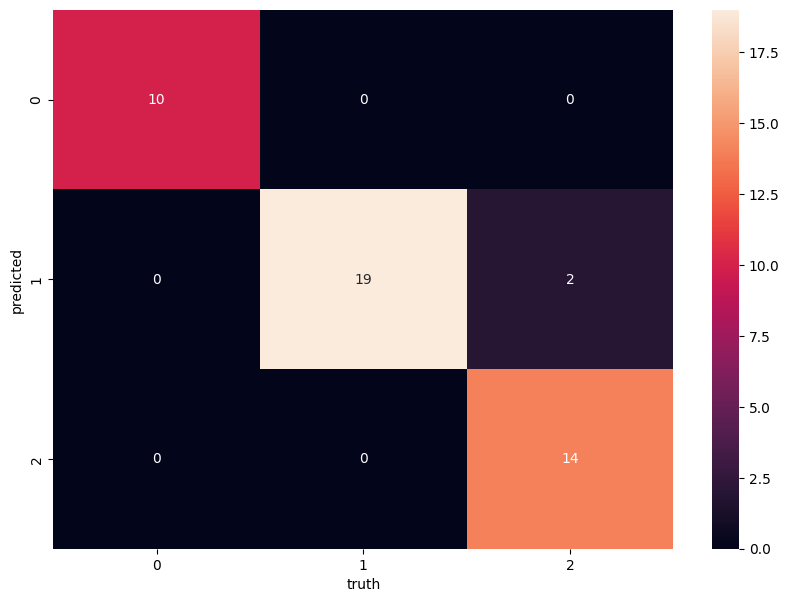

In [60]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("truth")
plt.ylabel("predicted")